# To visualize data

In [1]:
# To avoid warnings printed during the execution
import warnings
warnings.simplefilter('ignore')

In [2]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.legend_handler import HandlerLine2D

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
bigdata = pd.read_csv('bigdata(tf-idf).csv')

In [5]:
bigdata = bigdata.drop(bigdata.loc[bigdata['genre'] == 2].index)
bigdata = bigdata.drop(bigdata.loc[bigdata['genre'] == 4].index)
bigdata = bigdata.drop(bigdata.loc[bigdata['genre'] == 8].index)
bigdata = bigdata.drop(bigdata.loc[bigdata['genre'] == 9].index)

In [6]:
bigdata.reset_index().head()

,level_0,Unnamed: 0,index,genre,bookId,entity.n.01,cheerfulness.n.01,eidos.n.01,ethos.n.01,inheritance.n.04,...,deodorant.n.01,hairdressing.n.01,lotion.n.01,perfume.n.02,weaponry.n.01,ammunition.n.01,armament.n.01,gunnery.n.01,hardware.n.01,totalWords
0,0,0,0,1,14976,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.488439,0.0,0.0,0.0,24106
1,1,1,1,1,2750,0.0,0.000000,0.0,0.0,0.171278,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,44801
2,2,2,2,1,2754,0.0,0.000000,0.0,0.0,0.188879,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,20313
3,3,3,3,1,2747,0.0,0.606649,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.392177,0.0,0.0,0.0,18298
4,4,4,4,1,2749,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,29215


In [7]:
genre = bigdata['genre']

In [8]:
del bigdata['genre']
del bigdata['Unnamed: 0']
del bigdata['index']
del bigdata['bookId']
del bigdata['totalWords']

In [9]:
Words = bigdata.values

In [10]:
pca = PCA(n_components=200)
ModelPca = pca.fit(Words)

In [11]:
df=pd.DataFrame()
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = Words[:,i]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df, genre, test_size=0.20, random_state=42)

In [58]:
rf =AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=2000)

In [59]:
rf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=2000, random_state=None)

In [60]:
pre=rf.predict(X_test)
#print(pre)
accuracy_score(y_test, pre)

0.92883211678832112

In [61]:
pre=rf.predict(X_train)
accuracy_score(y_train, pre)

0.99406392694063928

In [62]:
X = df
y = genre

k = 3
depth = 3
n_e = 2000

# Create 10 cross-validation sets for training and testing
cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

# Generate the training set sizes increasing by 50
train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

# Create a Decision tree regressor at max_depth = depth
regressor = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), algorithm="SAMME", n_estimators= n_e)
#regressor = DecisionTreeRegressor(max_depth = depth)

# Calculate the training and testing scores
sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
    cv = cv, train_sizes = train_sizes)

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

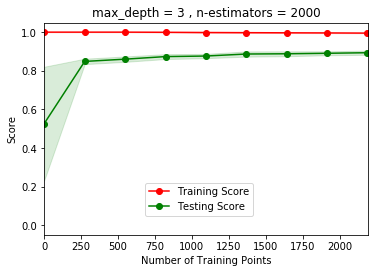

In [63]:
# Create the figure window
fig = pl.figure(figsize=(10, 7))

# Subplot the learning curve 
ax = fig.add_subplot(2, 2, k+1)
ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')

# Labels
ax.set_title('max_depth = %s , n-estimators = %s'%(depth,n_e))
ax.set_xlabel('Number of Training Points')
ax.set_ylabel('Score')
ax.set_xlim([0, X.shape[0]*0.8])
ax.set_ylim([-0.05, 1.05])

# Visual aesthetics
ax.legend(bbox_to_anchor=(0.65, 0.25), borderaxespad = 0.1)
fig.tight_layout()
fig.show()
#fig.savefig('3_20.png')